So far, the optimization problems you have seen are all unconstrained optimization problems (***unconstrained optimization problems***), instantaneously optimizing the loss function without any exploitation conditions (***constraints***) experienced.

Not only in Machine Learning, in reality, optimization problems often have many different constraints. For example:

- I want to rent a house no more than 5km from the center of Hanoi at the lowest price possible. In this problem, the rental price is the loss function (sometimes people also use the cost function to refer to the function to be optimized), **the condition that the distance is not more than 5km is the constraint**.

In Optimization, a constrained problem is often written in the form:

$$ \mathbf{x}^{*} = \text{argmin}_{\mathbf{x}} f_{0}(\mathbf{x})

subject to:

$$ f_{i}(\mathbf{x}) \leq 0, \quad i = 1, 2, ..., m $$
$$ h_{i}(\mathbf{x}) = 0, \quad i = 1, 2, ..., p $$

Where:
- $\vec{x} = [x_1, x_2, \cdots, x_n]$ is the variable to be optimized.
- $f_0(\vec{x})$ is the objective function to be optimized. (often called the loss function)
- $f_i(\vec{x}), h_i(\vec{x})$ are the constraint.

Set of $\vec{x}$ that satisfies all constraints is called the **feasible set**. Each point in the feasible set is called a **feasible point**.

**NOTE**:
- If the problem is to find the maximum value instead of the minimum, we just need to change the sign of $f_0(\vec{x})$.
- If the constraint is greater than or equal to $f_i(\vec{x}) \geq \beta$, we can convert it to $-f_i(\vec{x}) \leq -\beta$. (Where $\beta$ is a constant)
- If constant is equal, thus $h_i(\vec{x}) = \beta$, we can write it under two types of constraints: $h_i(\vec{x}) \leq \beta$ and $-h_i(\vec{x}) \leq -\beta$.

Optimization problems generally **do not have a general solution**, and **some problems do not have a solution**. Most methods for finding solutions do not prove whether the solution is a global optimal or not, that is, whether the point that makes the function reach its minimum or maximum value is correct. Instead, the solutions are often local optimals, that is, extreme points.

# Convex sets

### Definition

**Definition 1**: A set is called a ***convex set*** if the line segment connecting any two points in the set lies completely within the set.

Some examples of convex sets:

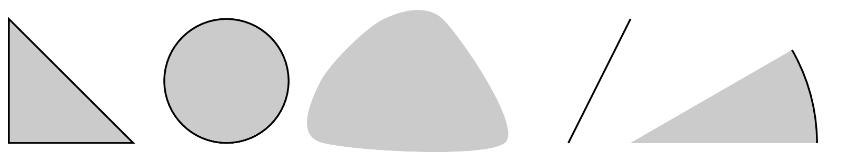

Here are a few examples of nonconvex sets, that is, sets that are not convex:

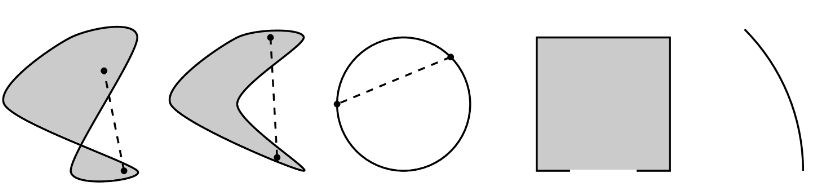

**Definition 2**: A set $\mathcal{C}$ is called a ***convex set*** if for any $\vec{x}, \vec{y} \in \mathcal{C}$ and $\theta \in [0, 1]$, we have $\theta \vec{x} + (1 - \theta) \vec{y} \in \mathcal{C}$.

With these definitions, the entire space is a convex set because every line segment lies in the space. The empty set can also be considered a special case of a convex set.

# Example 1

### Hyperplanes and Halfspaces

A ***hyperplane*** is a set of the form:

$$a_1x_1 + a_2x_2 + \cdots + a_nx_n = a^Tx = b$$

Where $a_1, a_2, \cdots, a_n$ are constants and $b$ is a scalar. Hyperplanes is a convex set. This can be easily proven by the definition of convex sets.

$$a^Tx_1 = a^Tx_2 = b$$

With any $0 \leq \theta \leq 1$, we have:

$$a^Tx_{\theta} = a^T(\theta x_1 + (1 - \theta)x_2) = \theta b + (1 - \theta)b = b$$

Same with **halfspaces**, which can be proved like hyperplanes:

$$a_1x_1 + a_2x_2 + \cdots + a_nx_n \leq b$$

### Norm Ball

Euclidean balls is a collection of points that:

$$B(\vec{x}_c, r) = \{\vec{x} \in \mathbb{R}^n | ||\vec{x} - \vec{x}_c||_2 \leq r\}$$

Where $\vec{x}_c$ is the center of the ball and $r$ is the radius. Euclidean balls are convex sets. With any $x_1, x_2 \in B(x_c, r)$, we have:

$$ ||x_1 - x_c||_2 = \|\theta(x_1 - x_c) + (1 - \theta)(x_2 - x_c)\|_2 \\ \leq \theta r + (1 - \theta)r = r$$

When using norm $p \geq 1$:

$$ ||x||_p = (|x_1|^p + |x_2|^p + \cdots + |x_n|^p)^{\frac{1}{p}} $$

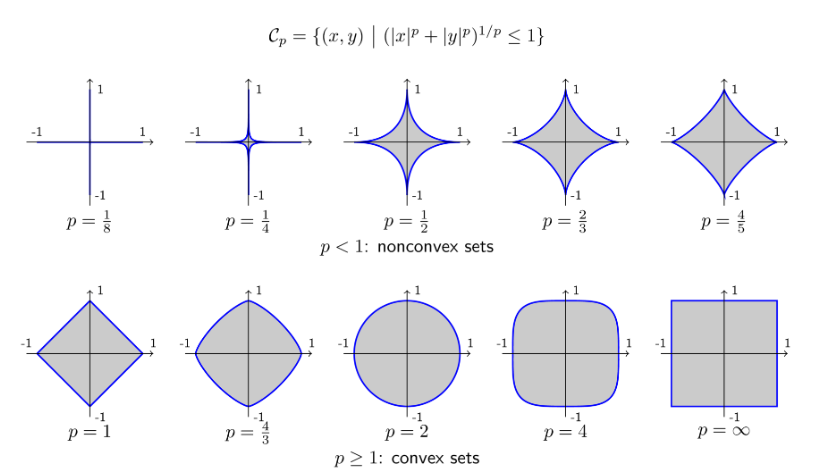

**Ellipsoids** according to the norm $p$ are also convex sets. It has some relationship with the Mahalanobis distance.

##### Mahalanobis distance

Mahalanobis Distance used to measure the distance between a point and a data distribution, taking into account the correlation between the variables and their variability. It is not a norm in the strict mathematical sense like the Euclidean norm, but is often understood as a way of expressing the Mahalanobis distance in squared form.

Given a point $x$ from a probability distribution with mean $\mu$ and positive semi-definite $\Sigma$. The formula is defined as:

$$
\text{Distance}_M(x) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
$$

where: 
- $\mu$ is the mean of the data points
- $\Sigma$ is the covariance matrix of the data points.

### The intersection of convex sets is a convex set.

Take a look on the example below:

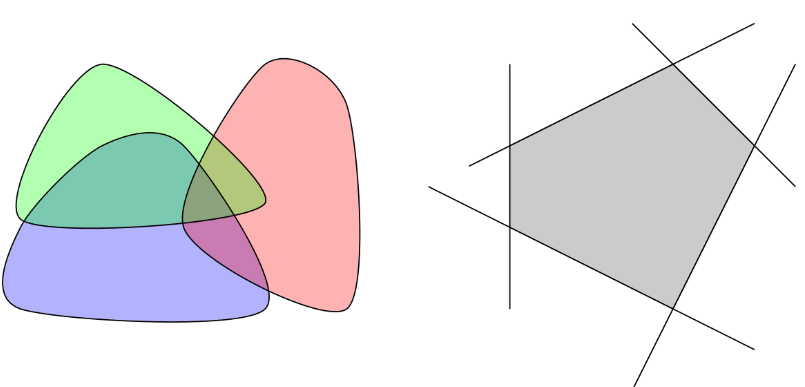

The intersection of two or all three convex sets is convex.

It is not difficult to prove this by Definition 2. If $\vec{x}_1, \vec{x}_2$ belongs to the intersection of convex sets, thus belongs to all given convex sets, then $\theta \vec{x}_1 + (1 - \theta) \vec{x}_2$ also belongs to all given convex sets.

From this we can deduce that the intersection of *halfspaces* and *hyperplanes* is also a convex set. In two-dimensional space, this convex set is a **convex polygon**, in three-dimensional space, it is called a **convex polyhedron**.

In multi-dimensional space, the intersection of *halfspaces* and *hyperplanes* is called a **polyhedra**.

# Convex combination and Convex hulls

A point is called a ***convex combination*** of points $x_1, x_2, \cdots, x_n$ if it can be written as:

$$ x = \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n $$

Where $\theta_i \geq 0$ and $\sum_{i=1}^{n} \theta_i = 1$.

The **convex hull** of **any set** is the set of all points that are *convex combinations* of that set. The *convex hull* is a *convex set*. The **convex hull** of a **convex set** is **itself**. An easy way to remember is that the convex hull of a set is the smallest convex set that contains that set. The concept of smallest is difficult to define, but it is also an intuitive way to remember.

Two sets are called linearly separable if their convex hulls have no points in common.

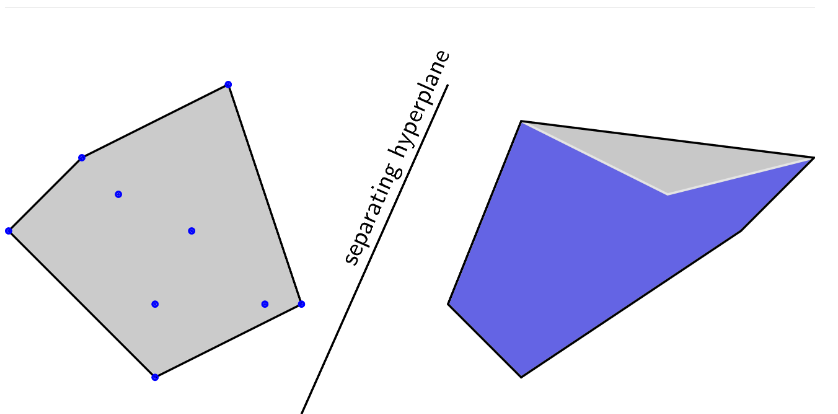

**Separating hyperplane theorem**: This theorem states that *if two convex sets are not empty* $\mathcal{C}$, $\mathcal{D}$ are disjoint, then there is vector $\vec{a}$ and scalar $b$ such that:

$$ \vec{a}^T \vec{x} \leq b, \quad \forall \vec{x} \in \mathcal{C} $$
$$ \vec{a}^T \vec{x} \geq b, \quad \forall \vec{x} \in \mathcal{D} $$

A set of points $\vec{x}$ satisfy $\vec{a}^T \vec{x} = b$ is called a hyperplane. The hyperplane divides the space into two halfspaces. The hyperplane is the boundary of the halfspaces.

# Convex function

**The domain of a function $f(.)$ denoted as $\text{domf}$**

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is called a ***convex function*** if $\text{domf}$ is a convext set and:

$$ f(\theta \vec{x} + (1 - \theta) \vec{y}) \leq \theta f(\vec{x}) + (1 - \theta) f(\vec{y}) $$

With every $\vec{x}, \vec{y} \in \text{domf}$ and $\theta \in [0, 1]$. (This is called the ***Jensen's inequality***)

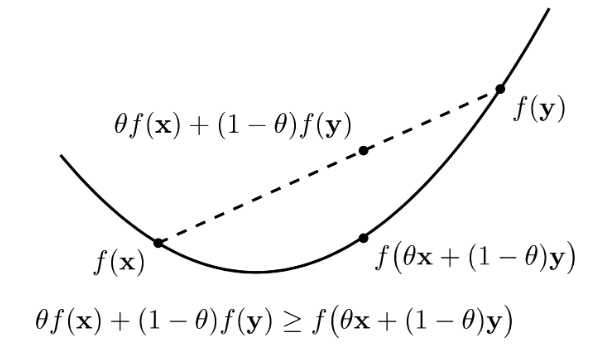

A function $f$ is called concave if $-f$ is convex. A function cant exist both convex and concave. A linear function can be concave or convex.

**Strictly convex function**: A function $f$ is called a ***strictly convex function*** if:

$$ f(\theta \vec{x} + (1 - \theta) \vec{y}) < \theta f(\vec{x}) + (1 - \theta) f(\vec{y}) $$

With every $\vec{x}, \vec{y} \in \text{domf}$, $\vec{x} \neq \vec{y}$, and $\theta \in (0, 1)$.

Same thing with **Strictly concave function**

**Properties of convex functions**:
- If $f(\vec{x})$ is *convex* then $\alpha f(\vec{x})$ is also *convex* for $\alpha > 0$ and $\alpha f(\vec{x})$ is *concave* for $\alpha < 0$.
- Sum of two convex functions is also a convex function, with definition set is the intersection of the two functions' definition set.
- **Pointwise maximum and supremum**: If all functions $f_i$ are convex, then this also a convex function:
$$f(\vec{x}) = \max_{i} f_i(\vec{x})$$

The ***$\max$*** function above can also be replaced with the ***$\sup$*** function. This property can be proven by Definition. You can also recognize it based on the example image below. Any line segment connecting any two points on the blue line does not lie below the blue line.

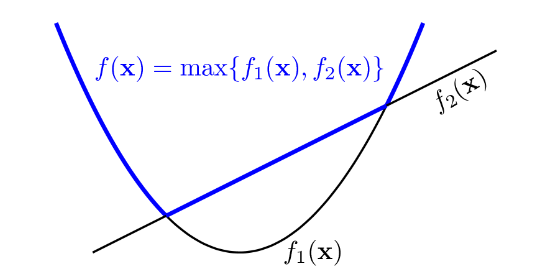

# Example

### One-variable Convex function

- $y = ax + b$ is a convex function because the line connecting any two points is on the main diagram.
- $y = \exp(ax)$ is a convex function with any $a \in \mathbb{R}$.
- $y = x^a$ also convex with $a \geq 1$ or $a \leq 0$.
- $y = x\log(x)$ is a convex function with $x > 0$.

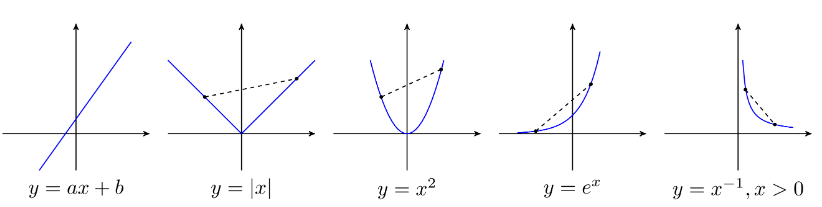

### One-variable Concave function

- $y = ax + b$ is a concave function because $-y$ is a convex function.
- $y = x^a$ is a concave function with $0 < a < 1$.
- $y = \log(x)$ is a concave function with $x > 0$.

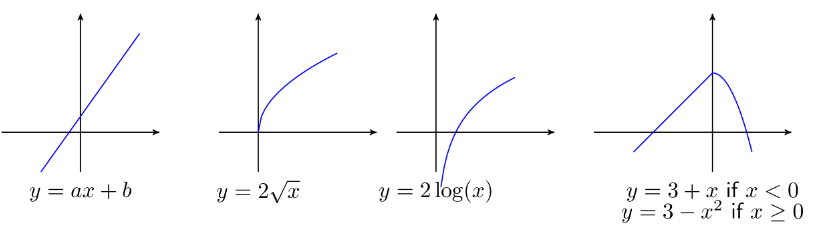

### Affine functions

Function $f(x) = a^Tx + b$ it's both convex and concave. This is a special case of convex functions called ***affine functions***.

When variable is a matrix $X$, affine function is defined as:

$$f(X) = \text{trace}(A^TX) + b$$

Where $A$ is a matrix and $b$ is a scalar.

### Quadratic forms

A single-variable quadratic function has the form $f(x) = ax^2 + bx + c$ is convex if $a > 0$, concave if $a < 0$.

Input variable is a vector $\vec{x}$, the quadratic function is defined as:

$$f(x) = \vec{x}^TA\vec{x} + \vec{b}^T\vec{x} + c$$

With $A$ usually a symmetric matrix, which $a_{ji} = a_{ij}$, $\forall i, j$ have number of row equal to $\vec{x}$ and $b$. $c$ is a scalar.

With $A$ is a matrix (half) positive definite then $f(x)$ is a convex function

With $A$ is a matrix (half) negative definite then $f(x)$ is a concave function ($x^TAx \leq 0, \forall x$)

Can be seen in Linear Regression loss function

### Norms

For basic math, if it satisfy all three properties of norms, then it is a convex function.

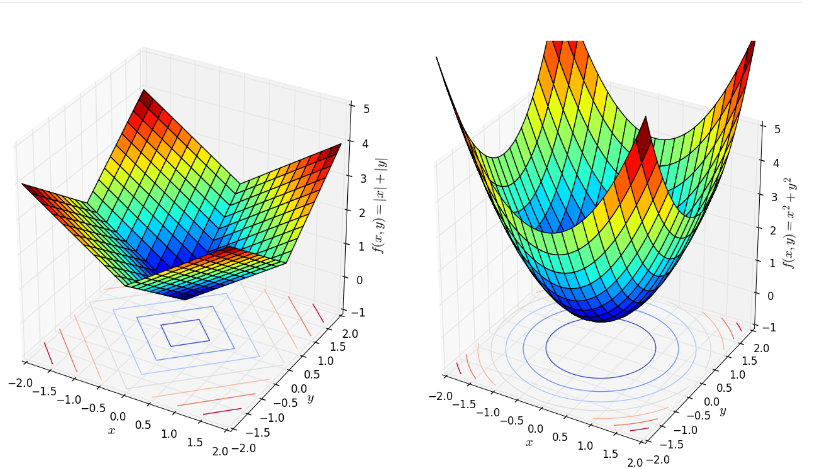

Notice that these surfaces all have a unique base relative to the origin (this is the first condition of the norm). The other strictly convex functions are similar, that is, they have a unique base. This means that if we drop a ball at any position on these surfaces, it will eventually roll to the bottom. If we think of the Gradient Descent algorithm, applying this algorithm to unconstrained problems with a strictly convex objective function (and assuming it is differentiable, that is, has derivatives) will give very good results if the learning rate is not too large. This is one of the reasons why convex functions are important.

Now you understand why we using L2 in Regularization or all the loss functions using square error, it is a convex function.

But in the other hand, there's exist some non-convex functions:

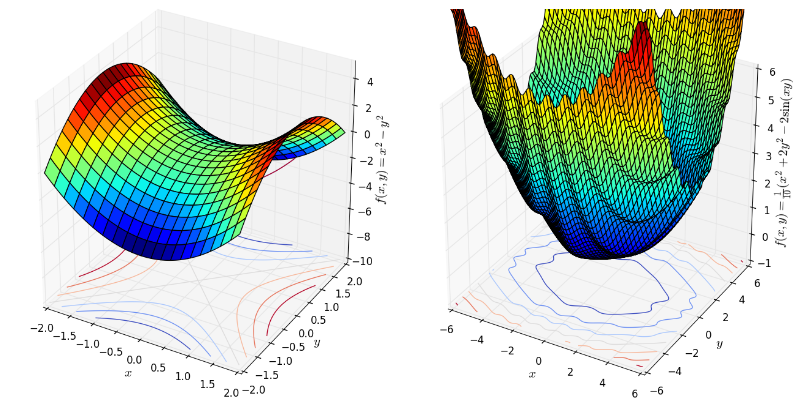

In AI, we commonly using *Countor plot* to visualize the convex function. The contour plot of a convex function is a set of nested ellipses. The closer to the center, the smaller the value of the function.

When representing a function of two variables to test its convexity, or to find its extreme points, contours are often drawn instead of surfaces in three-dimensional space. Here are some examples of contours:

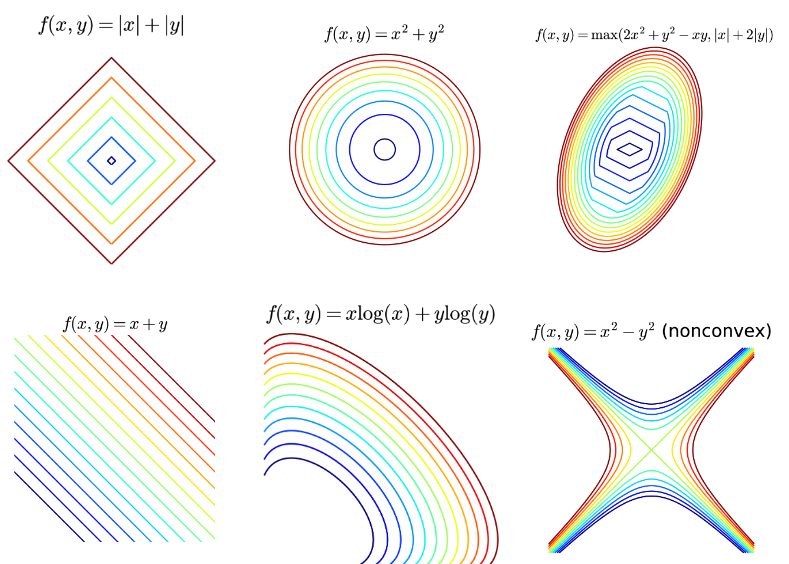

With *RED* means higher value, *BLUE* means lower value.

### $\alpha$ - sublevel sets

**Definition**: The $\alpha$-sublevel set of a function $f$ is defined as:

$$\mathcal{C}_{\alpha} = \{\vec{x} \in \text{domf} | f(\vec{x}) \leq \alpha\}$$

Thus, collection of all points $\vec{x}$ that make $f(\vec{x})$ less than or equal to $\alpha$.

Example can be seen in the previous image, the $\alpha$-sublevel set is the set of all points that lie within the contour line of value $\alpha$.

**Theorem**: If a function is convex then every $\alpha$-sublevel set is a convex set. But the opposite is not always true.

# Testing properties of convex functions using derivatives

### First-order derivative

There's a way to know if a function is convex or not by checking its first-order derivative.

The **First-order condition** said: Assume a function $f$ have a domain $\text{domf}$ is convex, then it have derivative at any point on that domain. So the function $f$ only convex **if and only if** with every $\vec{x}, \vec{x_0} \in \text{domf}$, we have:

$$y = f'(\vec{x_0}) (\vec{x} - \vec{x_0}) + f(\vec{x_0})$$

With multiple variables, the first-order derivative is:

$$y = \nabla f(\vec{x}_0)^T (\vec{x} - \vec{x}_0) + f(\vec{x}_0)$$

- The function is strictly convex if the $x = x_0$.

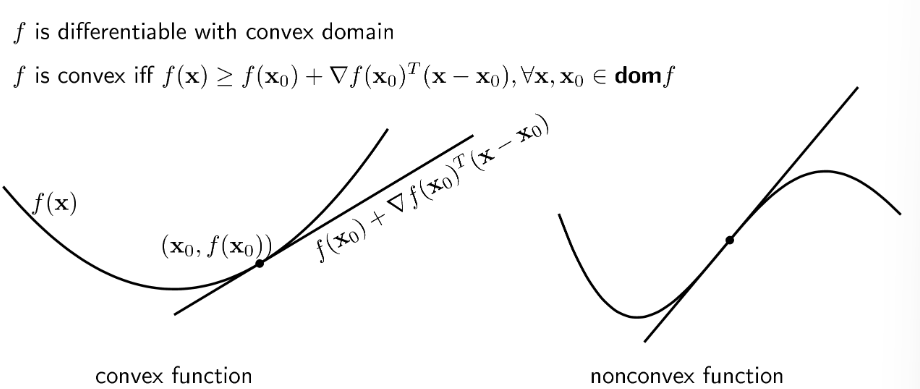

iff is the abbreviation of "if and only if".

Then to proved it we can see the derivative of the function:

$$\nabla f(\vec{x}) = 2A\vec{x}$$

So the First-order will look like (A is a symmetric matrix):

$$x^TAx \geq 2(Ax_0)^T (x - x_0) + x_0^TAx_0 \\
\Leftrightarrow x^TAx \geq 2x_0^TAx - x_0^TAx_0 \\
\Leftrightarrow (x - x_0)^TA(x - x_0) \geq 0$$

It's a positive definite matrix, so the function is convex.

### Second-order derivative

With multiple variables function, thus turn a vector, assume it have $d$ dimensions, the first derivative is a vector with $d$ dimensions. The second derivative is a matrix with $d \times d$ dimensions, called the **Hessian matrix**.

$$\nabla^2 f(\vec{x}) = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_d} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_d} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial^2 f}{\partial x_d \partial x_1} & \frac{\partial^2 f}{\partial x_d \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_d^2} \end{bmatrix}$$

If the Hessian is a positive defined then it's strictly convex. Otherwise, strictly concave.

With a single-variable function, this condition equal to $f''(x) \geq 0$ for any $x$ in the domain.